In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df=pd.read_csv('bank-full.csv',sep=';')



In [3]:
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#missing value handelling

In [7]:
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')


In [8]:
df.replace('unknown', np.nan, inplace=True)

na_counts = df.isna().sum()
na_counts
missing=pd.DataFrame(na_counts,columns=['No of missing values'])
missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,No of missing values,% missing_values
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,13020,29.0
day,0,0.0


In [9]:
df = df.drop('poutcome', axis=1)

In [10]:
df = df.drop('contact', axis=1)

In [11]:
#imbalaced or not
target_counts = df['y'].value_counts()

class_0_count = target_counts[0]
class_1_count = target_counts[1]

class_ratio = class_1_count / class_0_count

if class_ratio < 0.5 or class_ratio > 2:
    print("The data is imbalanced.")
else:
    print("The data is balanced.")


The data is imbalanced.


In [12]:
numerical_columns = df.select_dtypes(include=np.number).columns


In [13]:
categorical_columns = df.select_dtypes(include=np.object).columns

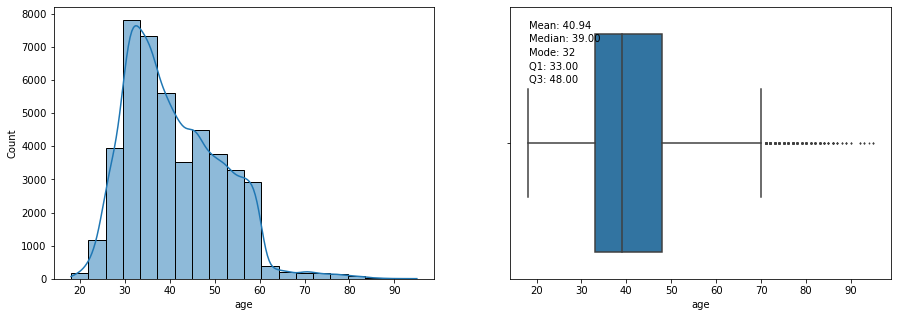

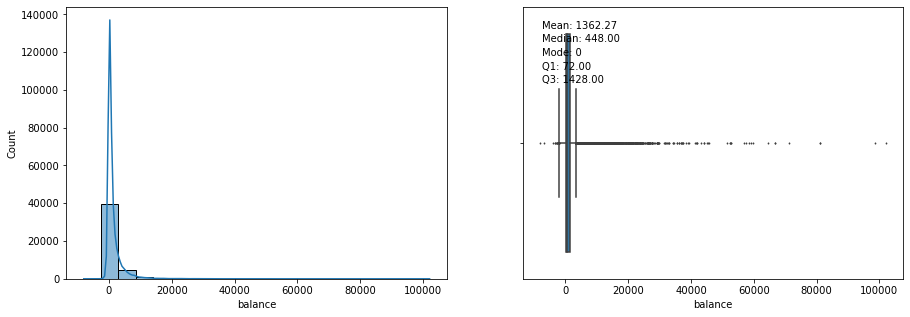

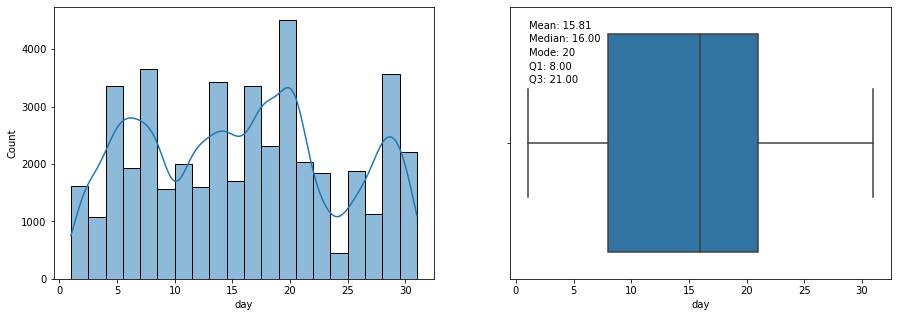

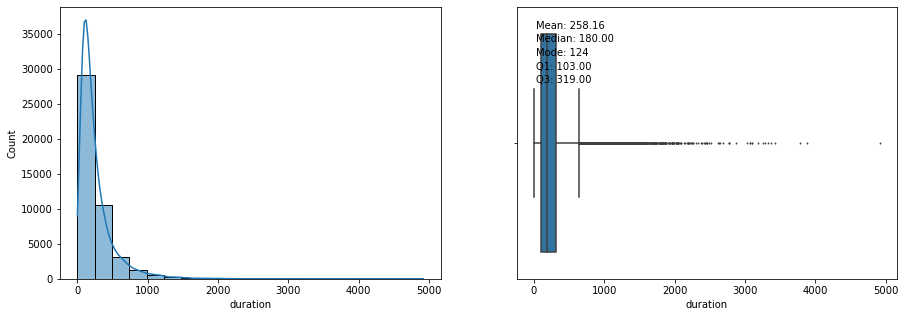

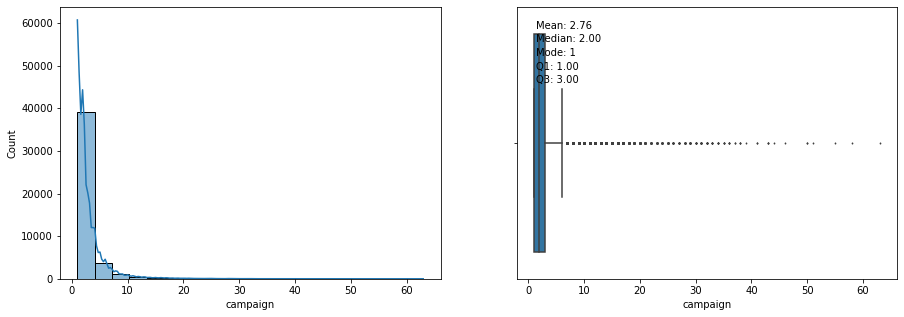

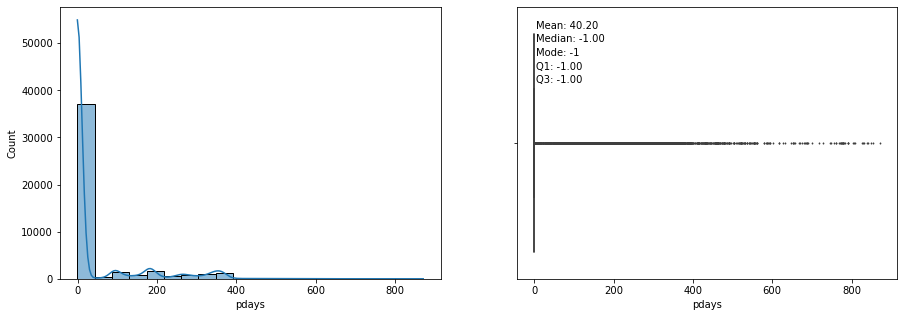

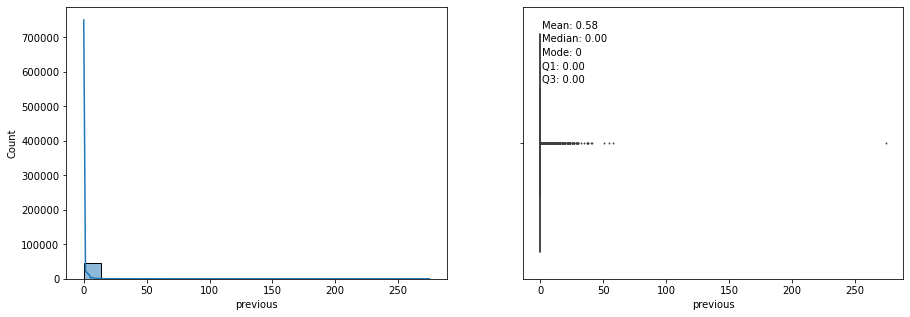

In [15]:
for i in numerical_columns:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(df[i], bins=20, kde=True, ax=axs[0])
    sns.boxplot(df[i], ax=axs[1], fliersize=1)

    mean = df[i].mean()
    median = df[i].median()
    mode = df[i].mode().values[0]
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    
    axs[1].text(0.05, 0.95, f"Mean: {mean:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.90, f"Median: {median:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.85, f"Mode: {mode}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.80, f"Q1: {q1:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.75, f"Q3: {q3:.2f}", transform=axs[1].transAxes, ha='left', va='top')

plt.show()


In [16]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [17]:
condition2 = (df['duration']<5/60)
df = df.drop(df[condition2].index, axis = 0, inplace = False)

In [18]:
ed=(df['education'] == 'other')
df= df.drop(df[ed].index, axis = 0, inplace = False)

In [19]:
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [20]:
from scipy.stats import zscore

df[['balance']].mean()
df[['balance']].mean()

df['balance_outliers'] = df['balance']
df['balance_outliers']= zscore(df['balance_outliers'])

condition1 = (df['balance_outliers']>3) | (df['balance_outliers']<-3 )
df =df.drop(df[condition1].index, axis = 0, inplace = False)

In [21]:
c=['age', 'day', 'duration', 'campaign']

In [22]:
for feature in c:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    df.loc[df[feature] < lower_limit, feature] = lower_limit
    df.loc[df[feature] > upper_limit, feature] = upper_limit


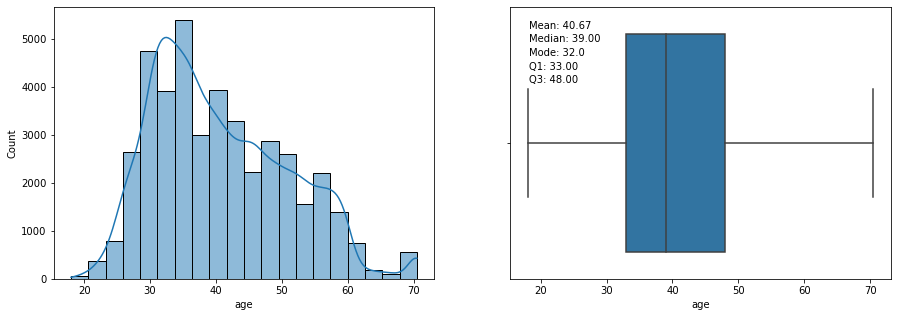

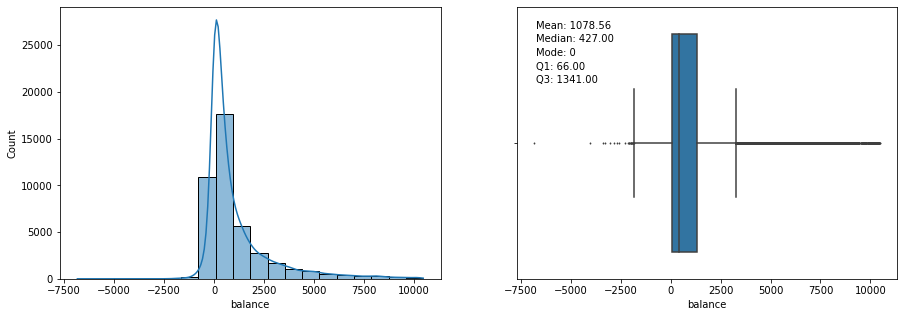

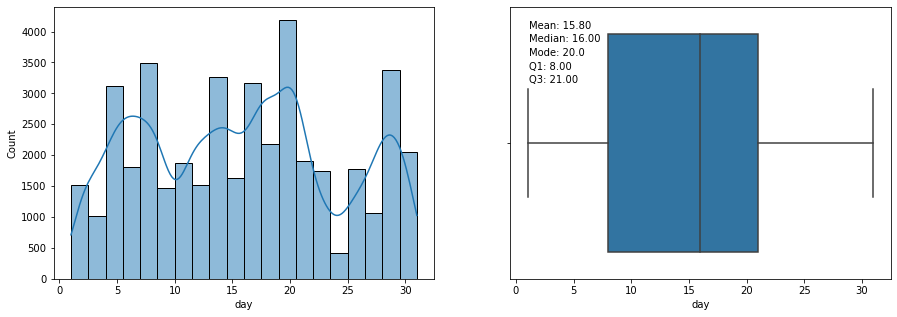

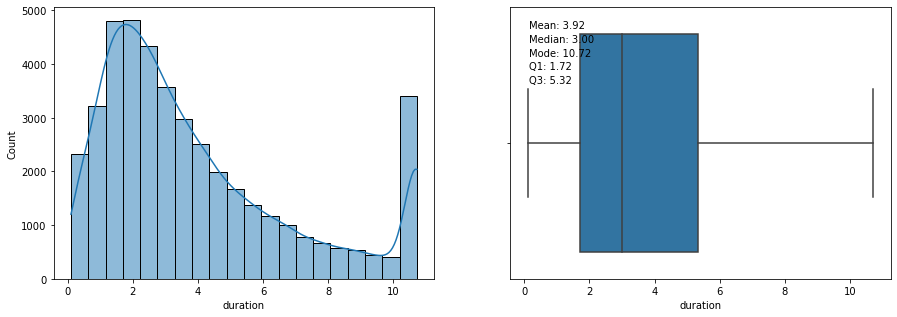

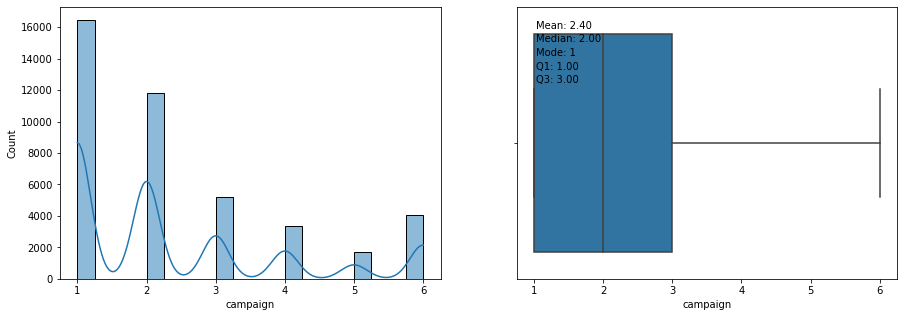

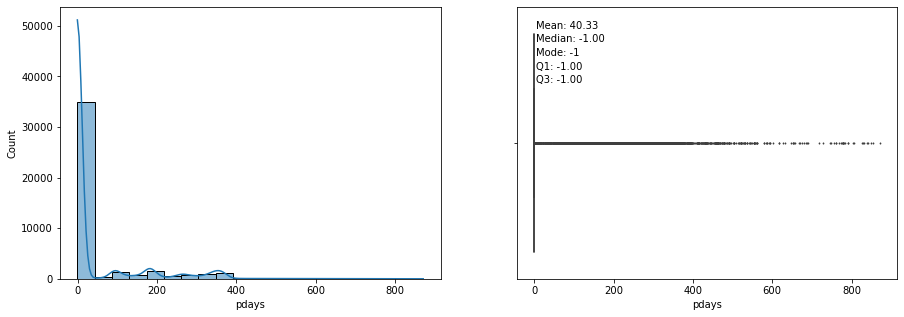

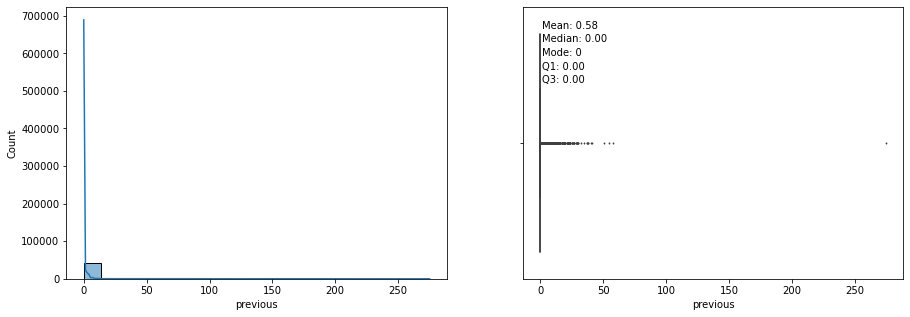

In [23]:
for i in numerical_columns:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(df[i], bins=20, kde=True, ax=axs[0])
    sns.boxplot(df[i], ax=axs[1], fliersize=1)

    # Calculate essential statistics
    mean = df[i].mean()
    median = df[i].median()
    mode = df[i].mode().values[0]
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    # Display statistics on the boxplot
    axs[1].text(0.05, 0.95, f"Mean: {mean:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.90, f"Median: {median:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.85, f"Mode: {mode}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.80, f"Q1: {q1:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.75, f"Q3: {q3:.2f}", transform=axs[1].transAxes, ha='left', va='top')

plt.show()


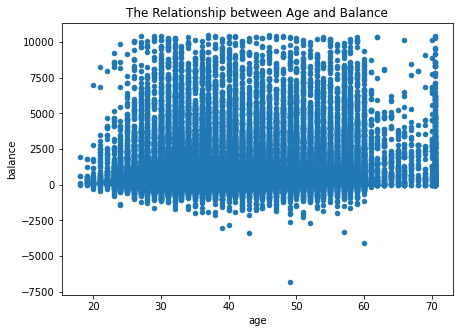

In [24]:

fig, axs = plt.subplots(1, 1, figsize=(7, 5))
df.plot.scatter('age', 'balance', ax=axs)
axs.set_title('The Relationship between Age and Balance')
plt.show()


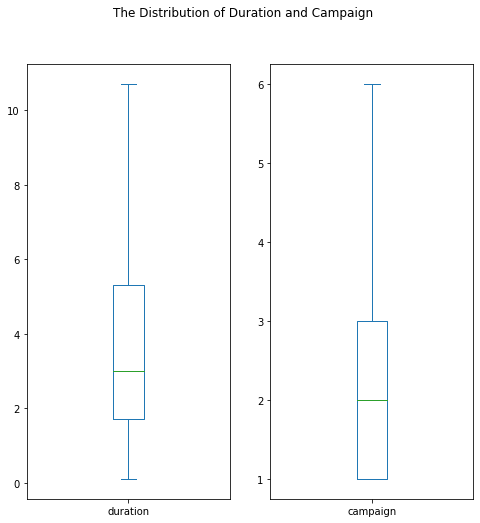

In [25]:
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box', figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

<AxesSubplot:xlabel='education'>

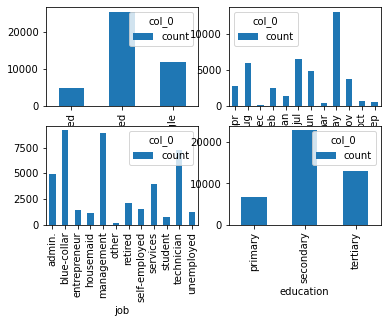

In [26]:
df1 = pd.crosstab(index = df["marital"],columns="count")    
df2 = pd.crosstab(index = df["month"],columns="count")  
df3= pd.crosstab(index = df["job"],columns="count") 
df4=pd.crosstab(index = df["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])       

In [27]:
df.rename(index=str, columns={'y':'response'}, inplace = True)

def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

convert(df,"response_binary", "response")

0    37661
1     4924
Name: response_binary, dtype: int64

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,response,balance_outliers,response_binary
0,58.0,management,married,tertiary,no,2143,yes,no,5.0,may,4.35,1,-1,0,no,0.259098,0
1,44.0,technician,single,secondary,no,29,yes,no,5.0,may,2.52,1,-1,0,no,-0.436283,0
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,5.0,may,1.27,1,-1,0,no,-0.445165,0
5,35.0,management,married,tertiary,no,231,yes,no,5.0,may,2.32,1,-1,0,no,-0.369837,0
6,28.0,management,single,tertiary,no,447,yes,yes,5.0,may,3.62,1,-1,0,no,-0.298786,0


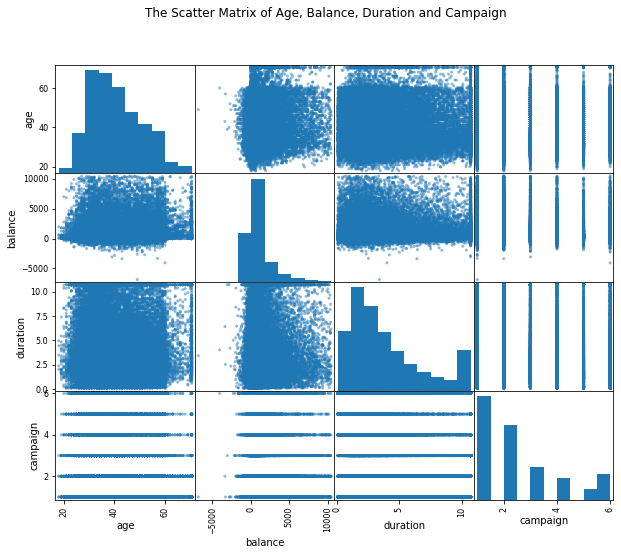

In [29]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df[['age','balance','duration','campaign']],figsize=(10,8))
plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

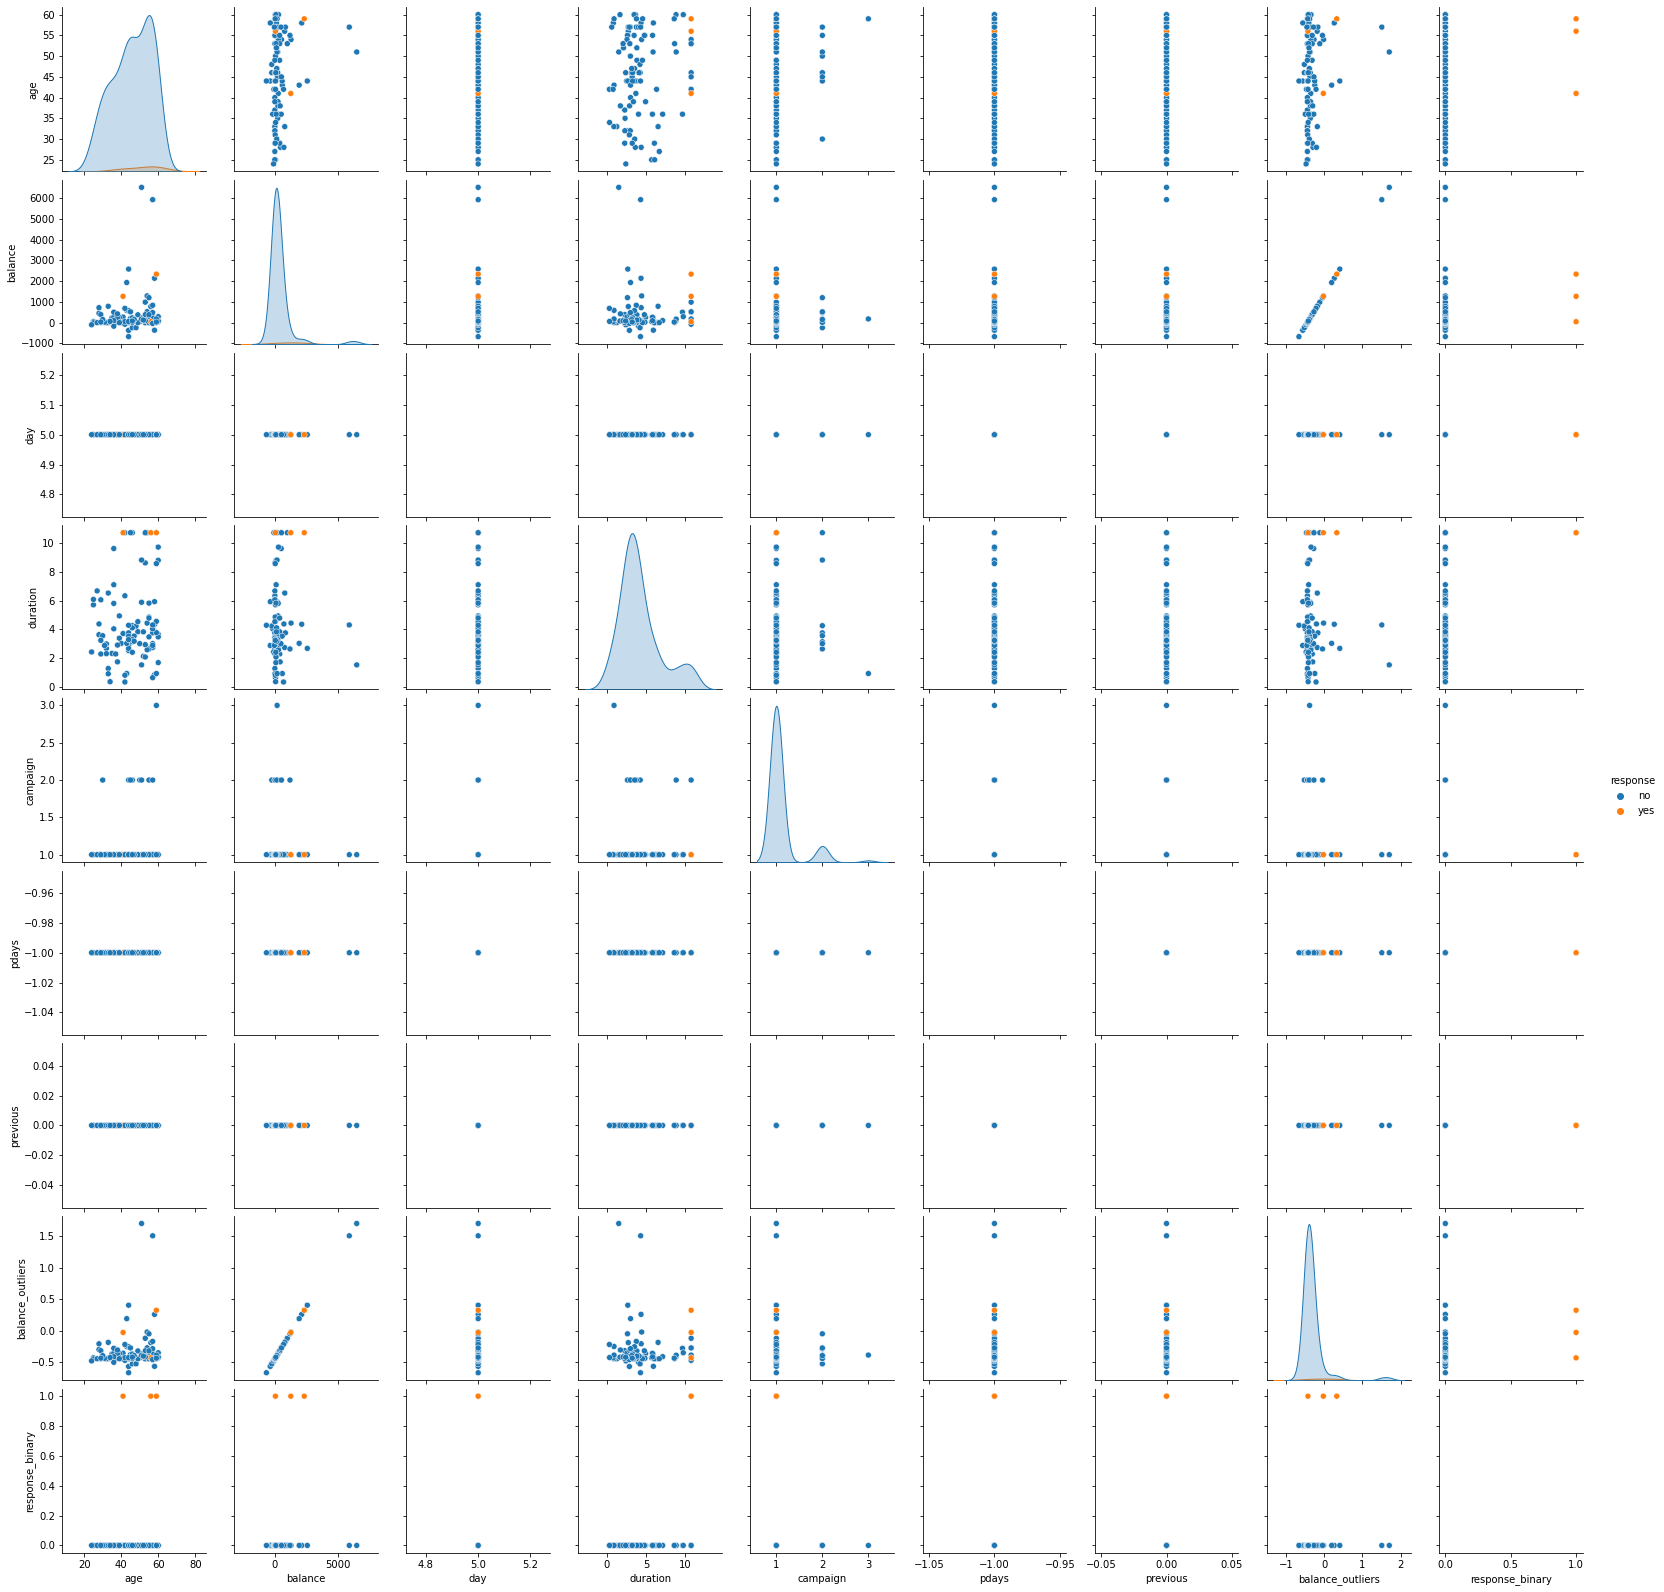

In [30]:
sns.pairplot(df[:100], hue='response')

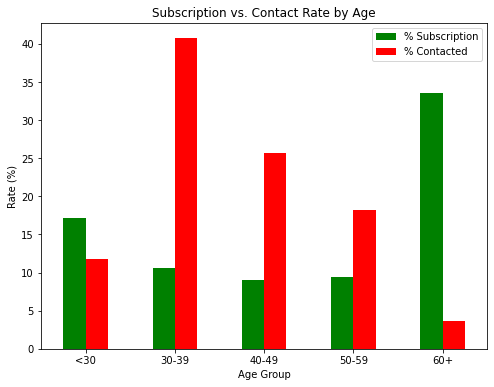

In [31]:
df['age_group'] = pd.cut(df['age'], bins=[0, 29, 39, 49, 59, 100], labels=['<30', '30-39', '40-49', '50-59', '60+'])

subscription_rate = df.groupby('age_group')['response'].apply(lambda x: (x == 'yes').mean() * 100)
contacted_rate = df['age_group'].value_counts(normalize=True) * 100

age_rates = pd.DataFrame({'% Subscription': subscription_rate, '% Contacted': contacted_rate})

age_rates = age_rates.reindex(['<30', '30-39', '40-49', '50-59', '60+'])

age_rates.plot(kind='bar', figsize=(8, 6), color=['green', 'red'])
plt.xlabel('Age Group')
plt.ylabel('Rate (%)')
plt.title('Subscription vs. Contact Rate by Age')
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()


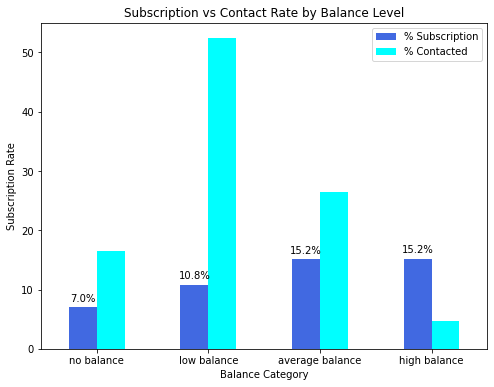

In [32]:
df['balance_group'] = pd.cut(df['balance'], bins=[float('-inf'), 0, 1000, 5000, float('inf')],
                                   labels=['no balance', 'low balance', 'average balance', 'high balance'])

subscription_rate = df.groupby('balance_group')['response'].apply(lambda x: (x == 'yes').mean() * 100)
contacted_rate = df['balance_group'].value_counts(normalize=True) * 100

balance_rates = pd.DataFrame({'% Subscription': subscription_rate, '% Contacted': contacted_rate})

balance_order = ['no balance', 'low balance', 'average balance', 'high balance']
# Sort the DataFrame by balance groups
balance_rates = balance_rates.reindex(balance_order)
# Plot the bar chart
plot_balance = balance_rates[['% Subscription', '% Contacted']].plot(kind='bar',
                                                                     color=['royalblue','aqua'],figsize=(8, 6))
plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation='horizontal')

# Label the bars
for rect, label in zip(plot_balance.patches, balance_rates['% Subscription'].round(1).astype(str)):
    height = rect.get_height()
    plot_balance.text(rect.get_x() + rect.get_width() / 2, height + 1, label + '%',
                      ha='center', color='black')

plt.show()


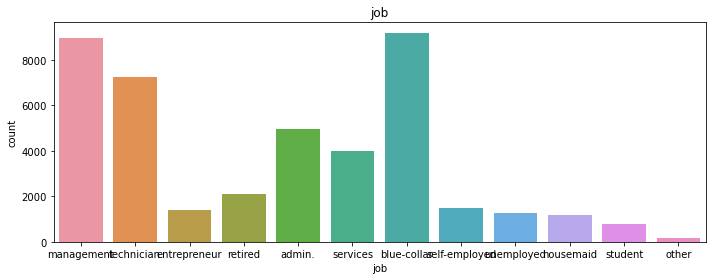

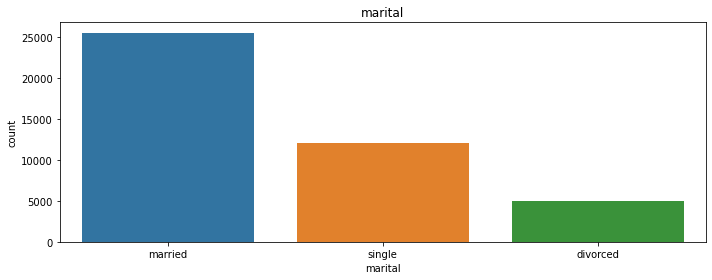

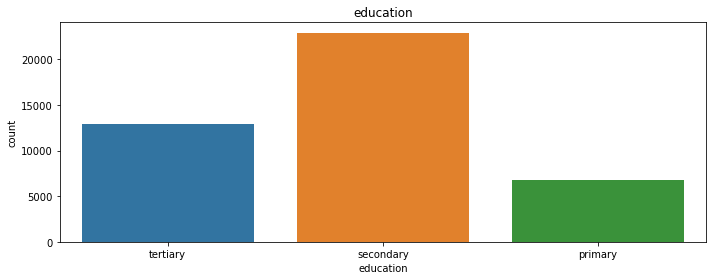

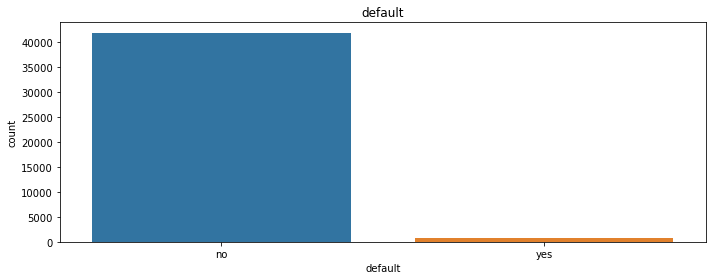

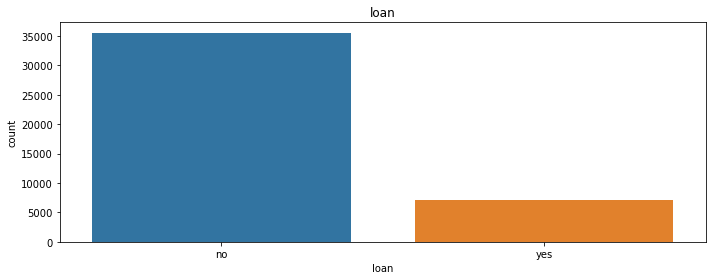

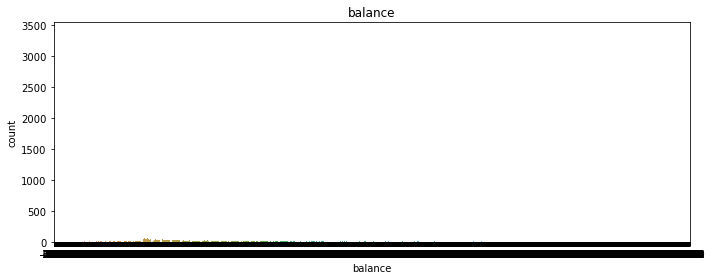

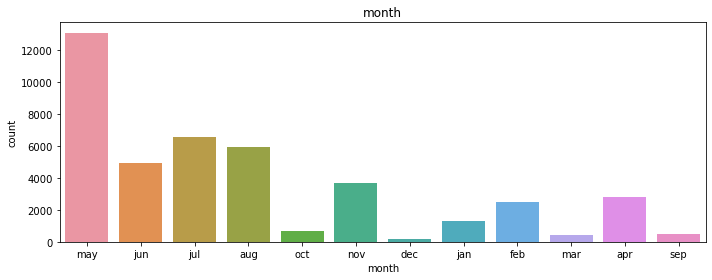

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'balance', 'month']

for col in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()

plt.show()


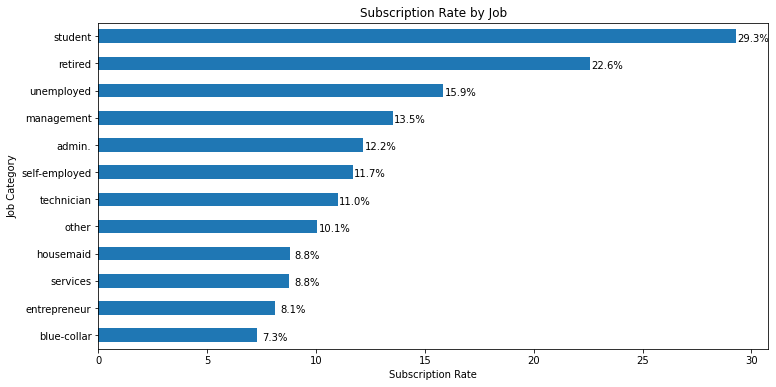

In [34]:
count_job_response_pct = pd.crosstab(df['response'], df['job']).apply(lambda x: x / x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

plot_job = count_job_response_pct['yes'].sort_values(ascending=True).plot(kind='barh', figsize=(12, 6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches, count_job_response_pct['yes'].sort_values(ascending=True).round(1).astype(str)):
    plot_job.text(rec.get_width() + 0.8, rec.get_y() + rec.get_height() - 0.5, label + '%', ha='center', va='bottom')

plt.show()


In [35]:
#encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['response']=le.fit_transform(df['response'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['month']=le.fit_transform(df['month'])
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])



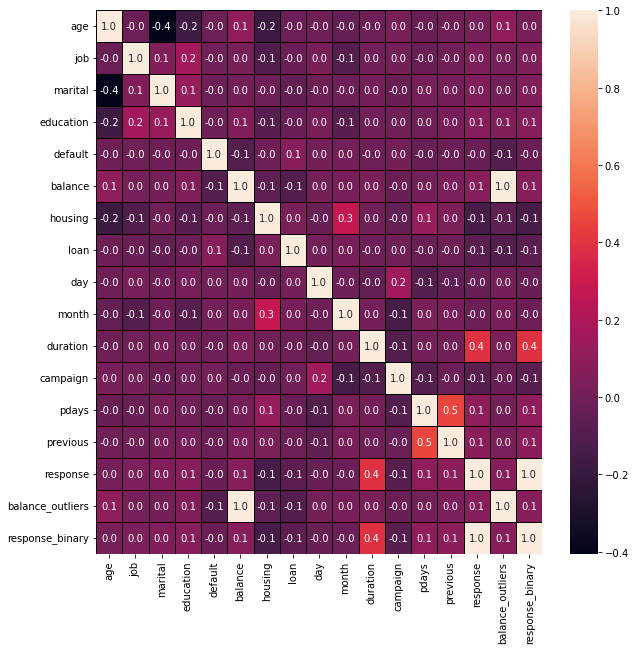

In [37]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()


In [41]:
import pandas as pd

In [42]:
df1 = pd.read_csv('bank_cleaned.csv')
df1= df1.drop(['Unnamed: 0'], axis=1)

In [43]:
df1.drop(['marital'], axis=1, inplace=True)
df2 = df1.iloc[:, 0:7]



In [45]:
df3 = pd.get_dummies(df2, columns = ['job'])
df3 = pd.get_dummies(df3, columns = ['education'])
df3['housing'] = df3['housing'].map({'yes': 1, 'no': 0})
df3['default'] = df3['default'].map({'yes': 1, 'no': 0})
df3['loan'] = df3['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(df1['response_binary'])
df3 = pd.merge(df3, dataset_response, left_index = True, right_index = True)

In [46]:
array = df3.values

x = array[:,0:-1]
y= array[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [48]:
test_size= 0.20
seed = 7
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=test_size, random_state=seed)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [59]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [60]:
kfold = KFold(n_splits=10)


In [61]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [62]:
results_c = []
names_c = []

for name, model in models:
    
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.885253 (0.000164)
KNN: 0.875398 (0.002992)
CART: 0.836343 (0.003340)
NB: 0.823856 (0.005487)


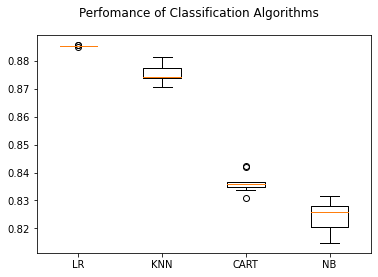

In [63]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [64]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [65]:
predictions = LR.predict(x_test)

In [66]:
print(accuracy_score(y_test, predictions))

0.8909291222915902


[[7278    0]
 [ 891    0]]


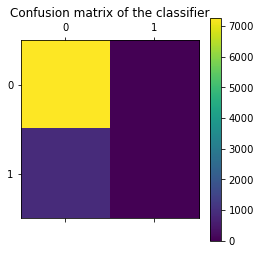

In [67]:
 from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7278
           1       0.00      0.00      0.00       891

    accuracy                           0.89      8169
   macro avg       0.45      0.50      0.47      8169
weighted avg       0.79      0.89      0.84      8169



In [69]:
dataset = df3.drop(['response_binary'],axis = 1)
dataset['duration'] = df1['duration']

In [70]:
array = dataset.values
x= array[:,0:20]
y = array[:,20]

In [71]:
test_size= 0.20
seed = 10
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=test_size, random_state=seed)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [83]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [90]:
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # train the model
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -18.664210 (0.940183)
LASSO: -18.700197 (0.932466)
RIDGE: -18.664192 (0.940186)
EN: -18.699500 (0.932616)
KNN: -22.175764 (1.151587)
CART: -38.126192 (2.326631)


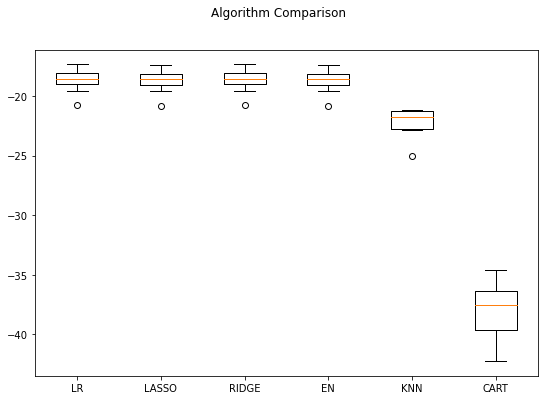

In [91]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

In [99]:
results_e2_normalized = []
names_e2_normalized = []

for name, model in pipelines:
   
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2_normalized.append(cv_results)
    names_e2_normalized.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -18.664231 (0.940060)
ScaledLASSO: -18.720626 (0.945767)
ScaledRIDGE: -18.664209 (0.940183)
ScaledEN: -18.720626 (0.945767)
ScaledKNN: -22.064231 (0.848520)
ScaledCART: -37.786465 (1.940050)


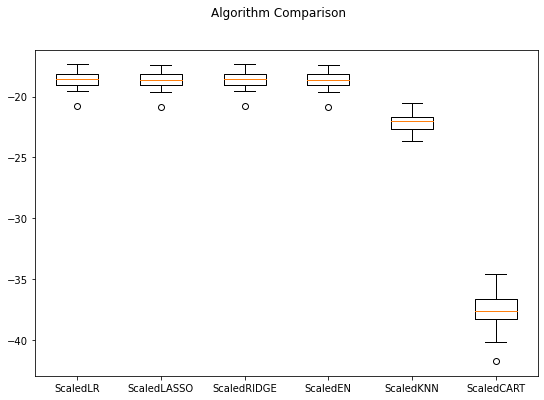

In [100]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2_normalized)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2_normalized)
plt.show()

In [102]:
ridge = Ridge()
ridge.fit(x_train, y_train)
predicted_y = ridge.predict(x_test)

In [103]:
from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(y_test, predicted_y))

The MSE is 17.7797404329447
